In [1]:
import pandas as pd
import matplotlib.pyplot as plt

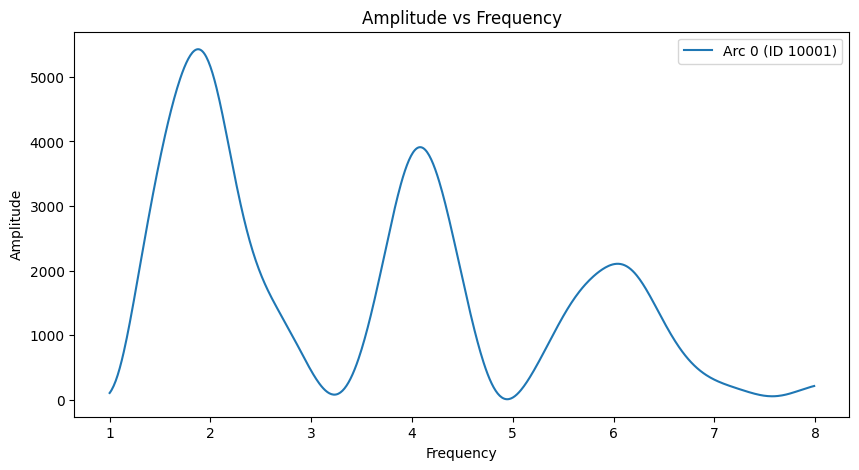

In [88]:
# Load the CSV files
arc_df = pd.read_csv('arc_freqs.csv')

arc_df = arc_df[arc_df['num'] >= 500]
arc_df = arc_df[arc_df['id'].astype(str).str.startswith('10')]

# col 0 = id, col 1 = frequency, col 2 = amplitude
plt.figure(figsize=(10, 5))
for arc in arc_df['i'].unique():
    arc_data = arc_df[arc_df['i'] == arc]
    plt.plot(arc_data['frequency'], arc_data['amplitude'], label=f'Arc {arc} (ID {arc_data['id'].values[0]})')

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.legend()
plt.show()

In [80]:
# Find the frequency with the highest amplitude per id
idx = arc_df.groupby('i')['amplitude'].idxmax()
max_amp_freqs = arc_df.loc[idx, ['i','id', 'frequency', 'amplitude','num']]


# Remove outliers from the frequencies using the IQR method
Q1 = max_amp_freqs['frequency'].quantile(0.25)
Q3 = max_amp_freqs['frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(max_amp_freqs)
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
max_amp_freqs = max_amp_freqs[(max_amp_freqs['frequency'] >= lower_bound) & (max_amp_freqs['frequency'] <= upper_bound)]
n_outliers = arc_df['i'].nunique() - max_amp_freqs['i'].nunique()
print(f"Removed {n_outliers} outliers")

# Calculate average and standard deviation of these frequencies
avg_freq = max_amp_freqs['frequency'].mean()
std_freq = max_amp_freqs['frequency'].std()

print(f"\nAverage frequency: {avg_freq:.4f}")
print(f"Standard deviation: {std_freq:.4f}")

      i     id  frequency     amplitude   num
124   0  10017       2.24   7484.296109  1387
890   1  21003       2.90   4270.958033   609
1572  2  40004       2.72   6264.734631  1867
2924  4  31030       2.24  12741.697279  1867
3616  5  30030       2.16  24981.999767  1854
4340  6  10019       2.40   7445.078089  1267
4931  7  20003       1.31   8093.660947   617
Lower bound: 1.6600000000000081, Upper bound: 3.0999999999999774
Removed 1 outliers

Average frequency: 2.4433
Standard deviation: 0.3000


In [49]:
# DATA
n_obs = arc_df['i'].nunique()
mean_all = arc_df['frequency'].mean()
std_all = arc_df['frequency'].std()
outliers = n_outliers
mean_cleaned = avg_freq
std_cleaned = std_freq

print(f"{n_obs},{mean_all:.4f},{std_all:.4f},{outliers},{mean_cleaned:.4f},{std_cleaned:.4f}")

32,11.4950,3.7528,6,10.9573,0.2465


In [89]:
records = pd.read_csv('records.csv', header=1, names=["id", "time", "network", "band", "elevation", "azimuth", "snr"])


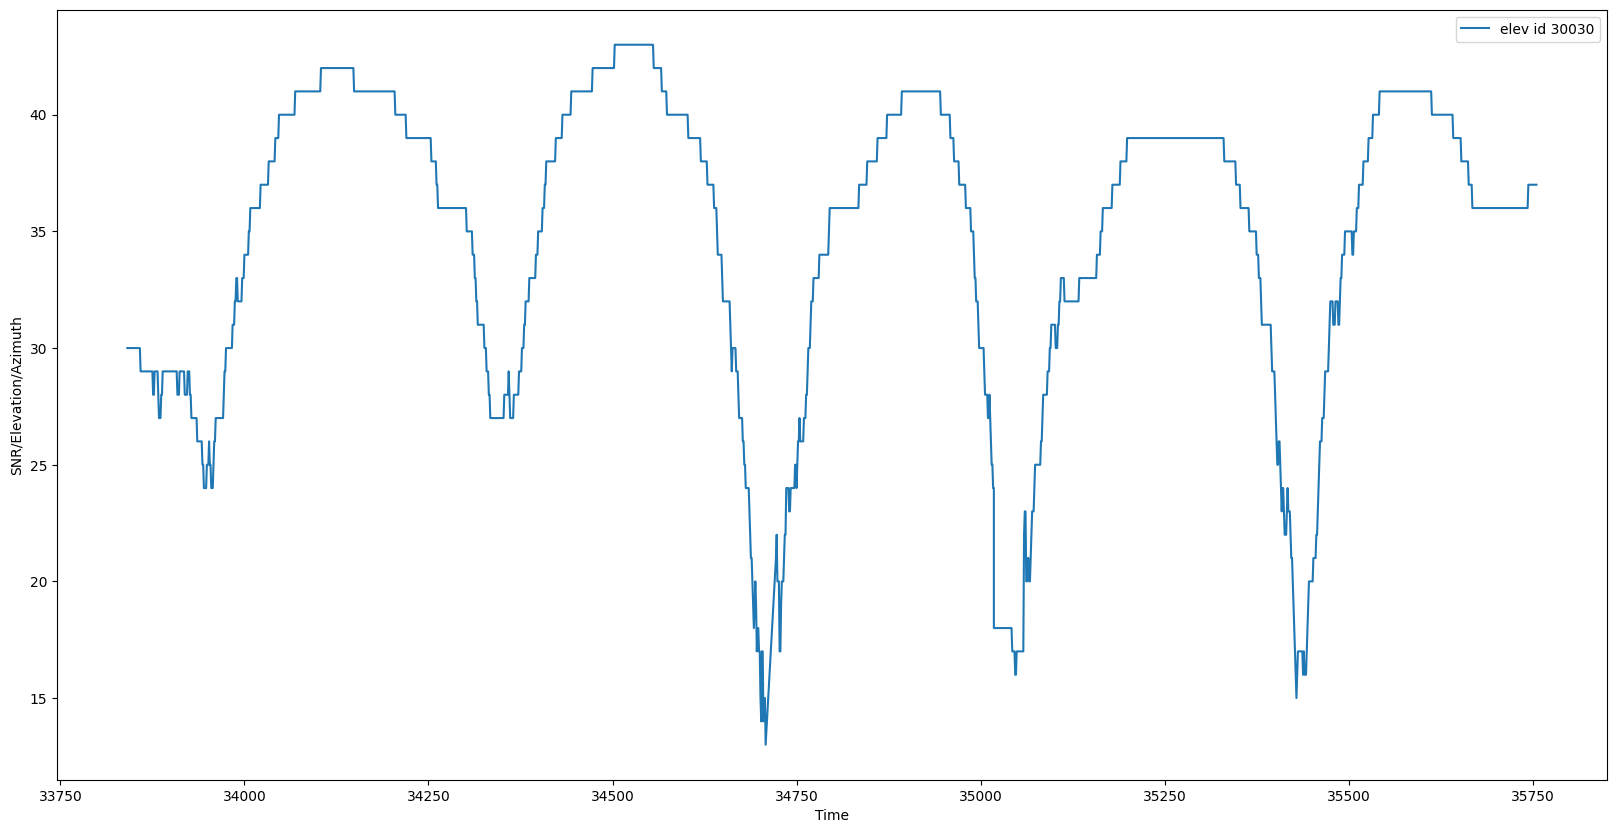

In [ ]:
plt.figure(figsize=(20, 10))
for id_val in records['id'].unique():
    if id_val != 10001:
        continue
    id_data = records[records['id'] == id_val]
    #plt.plot(id_data['elevation'], id_data['snr'], label=f'snr id {id_val}')
    plt.plot(id_data['time'], id_data['snr'], label=f'elev id {id_val}')
    # plt.plot(id_data['time'], id_data['azimuth'], label=f'azim id {id_val}')

    # break # Remove this line to plot all ids

plt.xlabel('Time')
plt.ylabel('SNR/Elevation/Azimuth')
plt.legend()
plt.show()

In [26]:
import re

with open('../data/nmea5.log', 'r', encoding='utf-8', errors='ignore') as infile:
    lines = infile.readlines()

pattern = re.compile(r'^\$.*\*[A-Za-z0-9]{2}$')
filtered_lines = [line for line in lines if pattern.match(line.strip())]

with open('../data/nmea5.txt', 'w') as outfile:
    outfile.writelines(filtered_lines)